In [216]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter('ignore')

In [217]:
# matplotlib for high level confg for high level resolutions of images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [218]:
# set seed to make the experiment more reproductable
# using this parameter makes sure that anyone who re-runs the code will get the exact same outputs
import tensorflow as tf
tf.random.set_seed(1)

In [219]:
# load the dataset
train = pd.read_csv(r"C:\Users\udayr\DeepLearning-TimeForcasting\train.csv", parse_dates=['date'])
test = pd.read_csv(r"C:\Users\udayr\DeepLearning-TimeForcasting\test.csv", parse_dates=['date'])

In [220]:
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [221]:
test.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [222]:
train.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


In [223]:
test.describe()

,id,date,store,item
count,45000.000000,45000,45000.000000,45000.00000
mean,22499.500000,2018-02-14 12:00:00.000000256,5.500000,25.50000
min,0.000000,2018-01-01 00:00:00,1.000000,1.00000
25%,11249.750000,2018-01-23 00:00:00,3.000000,13.00000
50%,22499.500000,2018-02-14 12:00:00,5.500000,25.50000
75%,33749.250000,2018-03-09 00:00:00,8.000000,38.00000
max,44999.000000,2018-03-31 00:00:00,10.000000,50.00000
std,12990.525394,NaN,2.872313,14.43103


In [224]:
train.shape

(913000, 4)

In [225]:
test.shape

(45000, 4)

In [226]:
# check the missing values in the training dataset
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [227]:
# check the missing values in the test dataset
test.isnull().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [228]:
# Time period of the train dataset
print('Minimum date from train set: %s' % train['date'].min().date())
print('Maximum date from train set: %s' % train['date'].max().date())

Minimum date from train set: 2013-01-01
Maximum date from train set: 2017-12-31


In [229]:
# Lets find of the time gap between the last day from the training set and the last day of the test set
# the amount of the day that need to be forecast

lag_size = (test['date'].max().date() - train['date'].max().date())
print('Maximum date from train set: %s', train['date'].max().date())
print('Maximum date from test set: %s', test['date'].max().date())
print("Forecast lag size", lag_size)

Maximum date from train set: %s 2017-12-31
Maximum date from test set: %s 2018-03-31
Forecast lag size 90 days, 0:00:00


In [230]:
# To explore the time series data first we need to aggregate the sales by date
daily_sales = train.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = train.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()

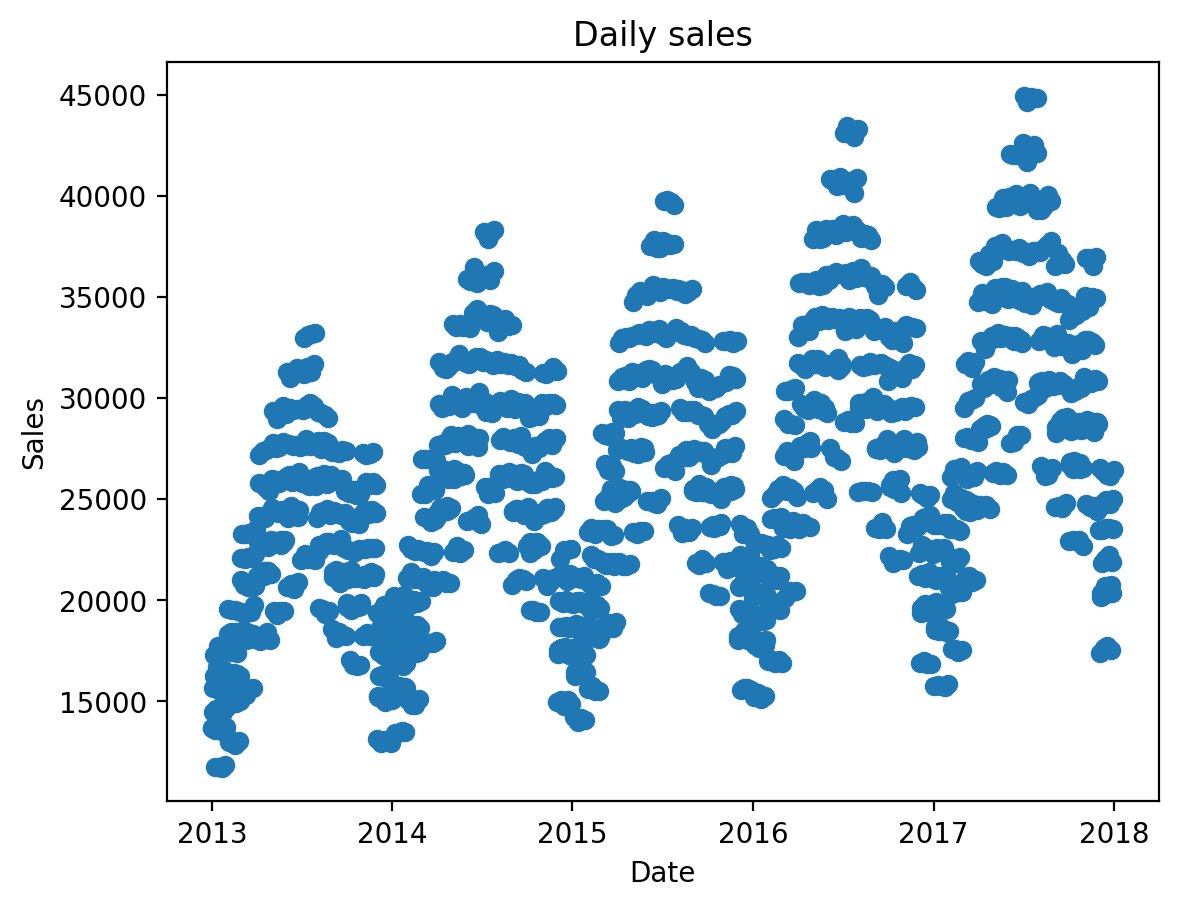

In [231]:
# Overall daily sales
daily_sales_sc = plt.scatter(x=daily_sales['date'], y=daily_sales['sales'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily sales')
plt.show()

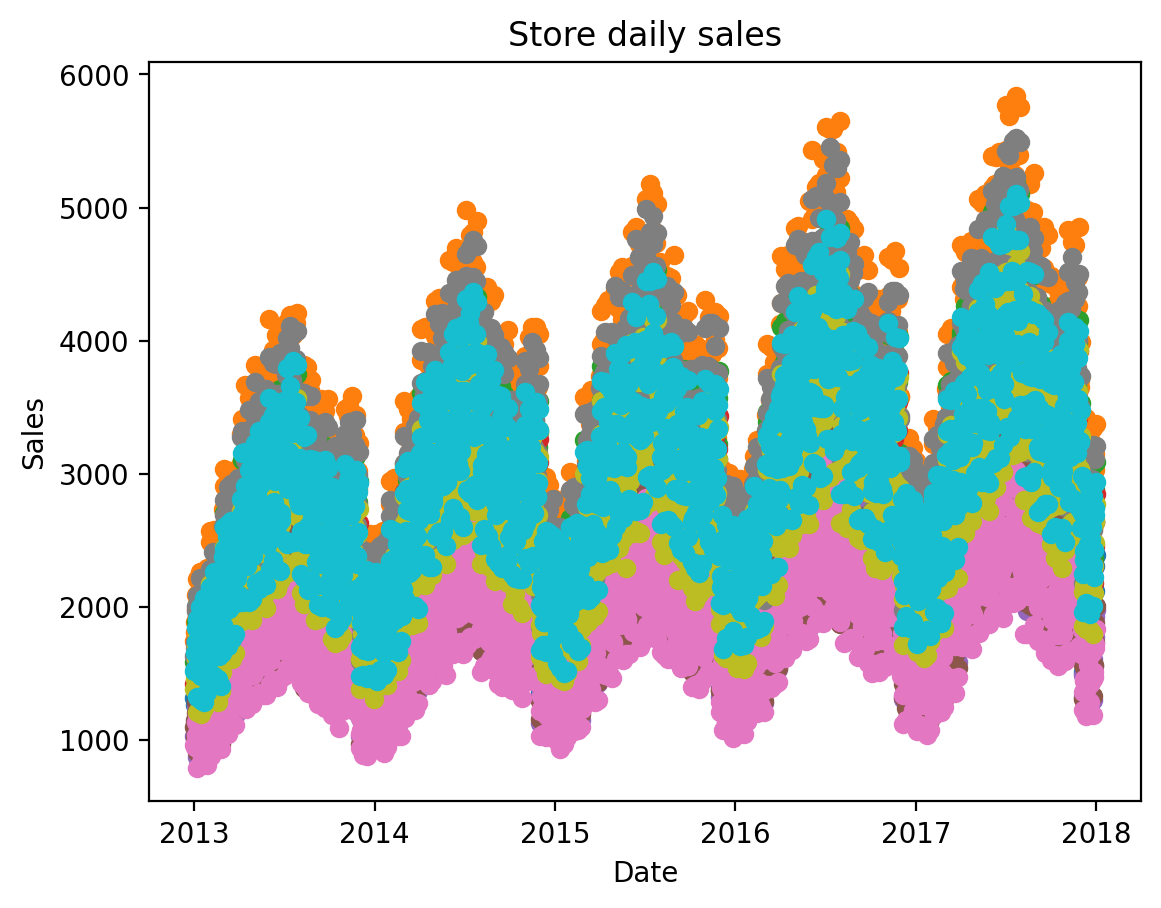

In [232]:
# Daily Sales by store
store_daily_sales_sc = []
for store in store_daily_sales['store'].unique():
  current_store_daily_sales = store_daily_sales[(store_daily_sales['store']==store)]
  store_daily_sales_sc.append(plt.scatter(x=current_store_daily_sales['date'], y=current_store_daily_sales['sales']))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Store daily sales')
plt.show()

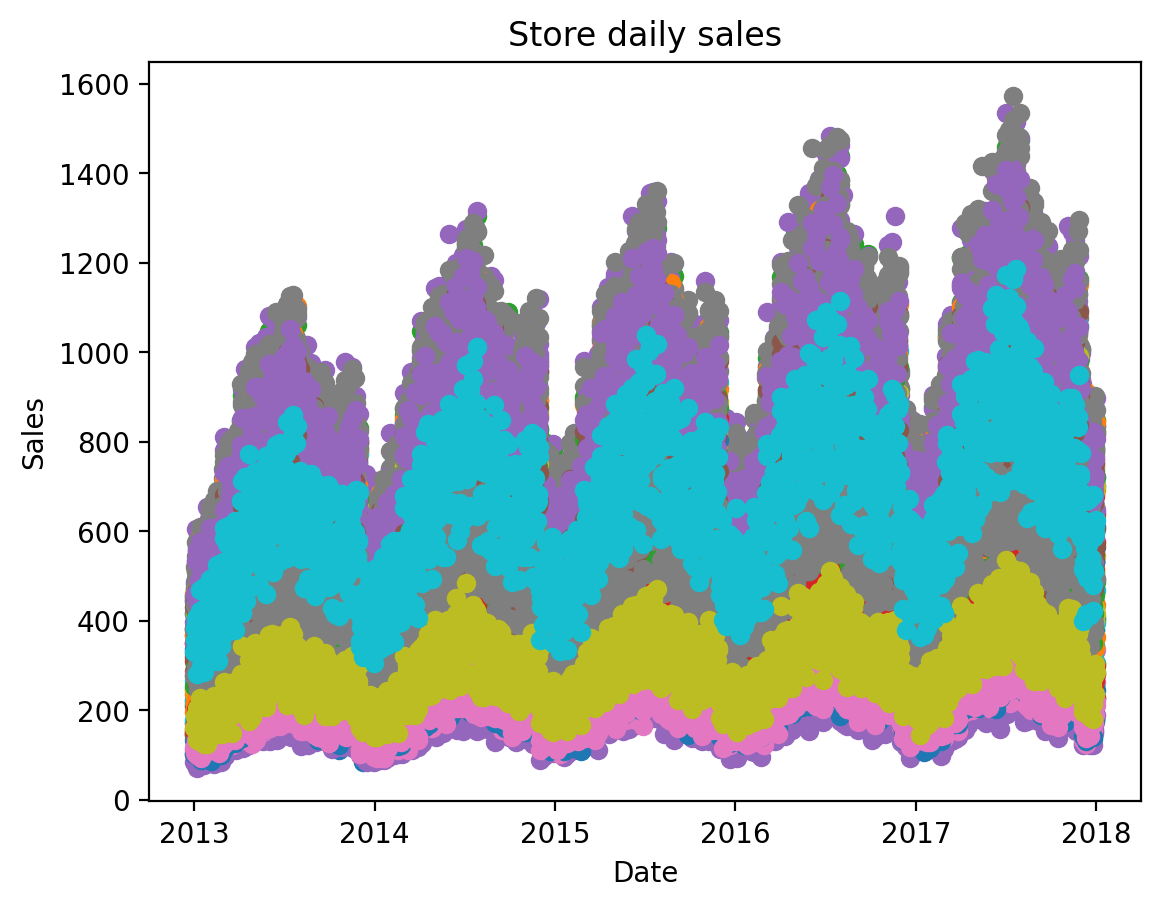

In [233]:
# daily sales by item
item_daily_sales_sc = []
for item in item_daily_sales['item'].unique():
  current_item_daily_sales = item_daily_sales[(item_daily_sales['item'] == item)]
  item_daily_sales_sc.append(plt.scatter(x=current_item_daily_sales['date'], y=current_item_daily_sales['sales']))

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Store daily sales')
plt.show()
